# **WINTER IS COMING....**

In [12]:
# Importing modules
import pandas as pd
# Reading in datasets/book1.csv
book1 = pd.read_csv('https://raw.githubusercontent.com/debadrita1517/Network-Analysis-On-Game-Of-Thrones/main/book1.csv')
# Printing out the head of the dataset
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


# **Uploading the Network of Thrones -**

In [13]:
# Importing modules
import networkx as nx
# Creating an empty graph object
G_book1 = nx.Graph()

# **Populating the Network with the Dataframe -**

In [14]:
# Iterating through the DataFrame to add edges
for i, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['https://raw.githubusercontent.com/debadrita1517/Network-Analysis-On-Game-Of-Thrones/main/book2.csv', 
               'https://raw.githubusercontent.com/debadrita1517/Network-Analysis-On-Game-Of-Thrones/main/book3.csv', 
               'https://raw.githubusercontent.com/debadrita1517/Network-Analysis-On-Game-Of-Thrones/main/book4.csv', 
               'https://raw.githubusercontent.com/debadrita1517/Network-Analysis-On-Game-Of-Thrones/main/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

# **The Most Important Character in The Game of Thrones -**

In [15]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])
# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])
# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[0:10]
# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[0:10]
# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


# **Evolution of the Importance of Characters in the Book -**

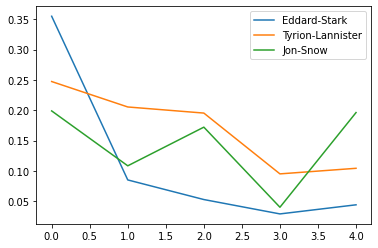

In [16]:
%matplotlib inline
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)
# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot();

# **What's up with Stannis Baratheon ?**

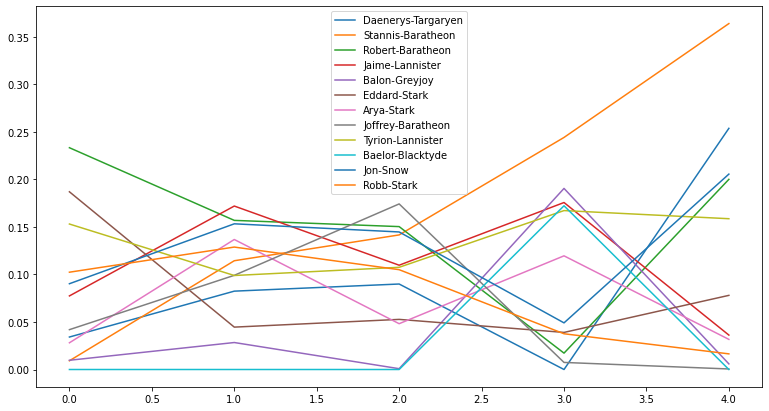

In [17]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]
# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)
# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)
# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7));

# **What Google PageRank Algorithm tells about Game of Thrones ?**

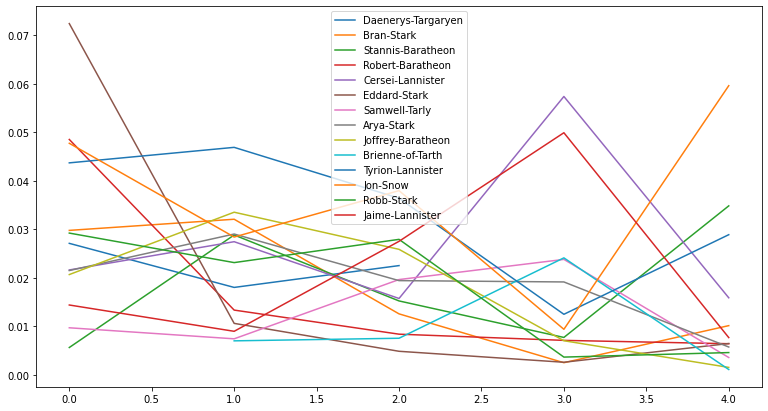

In [18]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book, weight='weight') for book in books]
# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)
# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)
# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7));

# **Correlation between Different Measures -**

In [19]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]
# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)
# Calculating the correlation
cor.corr().T

,Aegon-I-Targaryen,Daenerys-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Elia-Martell,Franklyn-Flowers,Haldon,Harry-Strickland,Jon-Connington,Lemore,Rhaegar-Targaryen,Rhaenys-Targaryen-(daughter-of-Rhaegar),Rolly-Duckfield,Tyrion-Lannister,Tywin-Lannister,Viserys-Targaryen,Yandry,Ysilla,Aemon-Targaryen-(Maester-Aemon),Clydas,Gilly,Jon-Snow,Samwell-Tarly,Stannis-Baratheon,Aenys-Frey,Hosteen-Frey,Theon-Greyjoy,Wyman-Manderly,Aeron-Greyjoy,Euron-Greyjoy,Victarion-Greyjoy,Aerys-II-Targaryen,Robert-Baratheon,Aggo,Barristan-Selmy,Daario-Naharis,Grey-Worm,Jhogo,Rakharo,Alliser-Thorne,Alys-Karstark,...,Nurse,Joramun,Richard-Horpe,Kerwin,Randyll-Tarly,Ronnet-Connington,Longwater-Pyke,Luton,Lyanna-Mormont,Lyanna-Stark,Maege-Mormont,Malaquo-Maegyr,Marya-Seaworth,Rodrik-Sparr,Morgo,Trystane-Martell,Yezzan-zo-Qaggaz,Tyene-Sand,Old-Bill-Bone,Patchface,Sweets,Petyr-Baelish,Ralf-(Limper),Walder-Frey-(son-of-Merrett),Yellow-Dick,Rodrik-Cassel,Walda-Frey-(daughter-of-Merrett),Roose-Ryswell,Scar,Shae,Tysha,Shrouded-Lord,Theomore,William-Foxglove,Walder-Frey-(son-of-Jammos),Wex-Pyke,Willow-Witch-eye,Thistle,Wylis-Manderly,Wulfe
Aegon-I-Targaryen,1.000000,-0.018377,0.278893,0.675768,0.647014,0.918495,0.999852,0.836828,0.995226,0.753194,0.999981,0.999846,-0.111612,-0.454044,0.565611,0.999258,0.938126,0.882815,0.770342,0.871403,0.256655,0.997371,-0.372971,0.999467,0.999382,0.641368,-0.008652,0.320632,-0.106795,0.322654,0.999048,-0.503287,0.971752,0.253308,0.998897,0.994284,0.991755,0.995547,0.997956,0.999952,...,0.997920,0.997518,0.996607,0.923577,0.999999,0.999516,0.999190,0.999669,1.000000,0.999614,0.999465,0.931750,1.000000,0.999226,0.999997,0.998596,0.999977,0.996048,0.999844,0.116414,0.997713,0.999274,0.999190,0.999998,0.995381,0.975883,0.981860,1.000000,0.743651,0.984089,0.312087,0.999997,-0.578654,1.000000,0.997255,1.000000,0.999742,0.923316,0.999994,0.999190
Daenerys-Targaryen,-0.018377,1.000000,0.955035,0.724571,0.750459,0.378486,-0.035547,0.531994,0.079287,0.643845,-0.024482,-0.035911,0.995635,0.899173,0.814139,0.020158,0.328996,0.453418,0.623366,0.474471,0.961623,-0.090777,0.934541,0.014273,-0.053502,0.755317,0.999953,0.941152,0.996076,0.940427,0.025262,0.873223,0.218105,0.962567,0.028580,0.088481,0.109905,0.075958,-0.082229,-0.028179,...,0.046110,0.052073,0.063973,-0.400322,-0.017093,-0.049475,-0.058597,-0.044078,-0.019232,-0.046148,-0.051056,-0.380161,-0.019232,-0.057693,-0.020834,-0.071313,-0.011595,-0.107110,-0.000729,0.990894,0.049243,-0.056443,-0.058597,-0.016562,0.077699,0.200322,0.171530,-0.019232,0.654789,-0.195733,0.944158,-0.020834,0.826070,-0.019232,-0.092358,-0.018104,-0.041092,-0.400943,-0.021945,-0.058597
Aegon-Targaryen-(son-of-Rhaegar),0.278893,0.955035,1.000000,0.896334,0.912672,0.635904,0.262358,0.759128,0.371282,0.841758,0.273023,0.262006,0.923194,0.728998,0.949696,0.315685,0.594191,0.697294,0.827174,0.714131,0.999734,0.208574,0.787009,0.310094,0.244973,0.915664,0.957873,0.999043,0.925046,0.998947,0.320525,0.689470,0.497653,0.999648,0.323668,0.379834,0.399660,0.368180,0.216958,0.269464,...,0.340215,0.345823,0.356983,-0.110622,0.280126,0.248881,0.240022,0.254110,0.278072,0.252105,0.247346,-0.088834,0.278072,0.240901,0.276532,0.227632,0.285400,0.192494,0.295797,0.986260,0.343163,0.242116,0.240022,0.280636,0.369802,0.481798,0.455916,0.278072,0.849440,0.103827,0.999396,0.276532,0.621831,0.278072,0.207021,0.279155,0.256999,-0.111296,0.275465,0.240022
Elia-Martell,0.675768,0.724571,0.896334,1.000000,0.999265,0.912169,0.663009,0.969047,0.744480,0.993857,0.671255,0.662736,0.657084,0.349924,0.990099,0.703666,0.889214,0.942816,0.990579,0.950471,0.885862,0.620581,0.431884,0.699472,0.649447,0.998955,0.731240,0.914870,0.660730,0.915730,0.707284,0.296849,0.830641,0.884251,0.709627,0.750608,0.764659,0.742247,0.627286,0.668509,...,0.721878,0.725996,0.734142,0.341504,0.676715,0.652509,0.645559,0.656593,0.675138,0.655029,0.651308,0.362002,0.675138,0.646250,0.673955,0.635774,0.680753,0.607627,0.688672,0.810771,0.724045,0.647205,0.645559,0.

# **Conclusion -**

In [20]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)
# Printing out the top character accoding to the three measures
print(p_rank)
print(b_cent)
print(d_cent)

Jon-Snow
Stannis-Baratheon
Jon-Snow
